In [1]:
# import Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
dataset = pd.read_csv("Data/covid19.csv")

In [3]:
dataset

,Tanggal,Hari,Terjangkit
0,2 Maret,1,2
1,3 Maret,2,2
2,4 Maret,3,2
3,5 Maret,4,2
4,6 Maret,5,4
5,7 Maret,6,4
6,8 Maret,7,6
7,9 Maret,8,19
8,10 Maret,9,27
9,11 Maret,10,34


In [4]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1:]

In [5]:
dataset.isnull().sum()

Tanggal       0
Hari          0
Terjangkit    0
dtype: int64

In [6]:
X = X.values
y = y.values

In [7]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regression.predict(X)

Text(0.5, 1.0, 'Linear Regression')

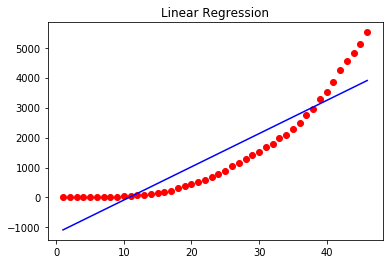

In [9]:
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color= "blue")
plt.title("Linear Regression")

In [10]:
print(f"Accuracy Linear: {round(regression.score(X, y)*100,2)} %")

Accuracy Linear: 83.89 %


In [11]:
from sklearn.preprocessing import PolynomialFeatures
polinomial = PolynomialFeatures(degree=4)
x_poly = polinomial.fit_transform(X)

In [12]:
regression2 = LinearRegression()
regression2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred2 = regression2.predict(x_poly)

Text(0, 0.5, 'Jumlah +')

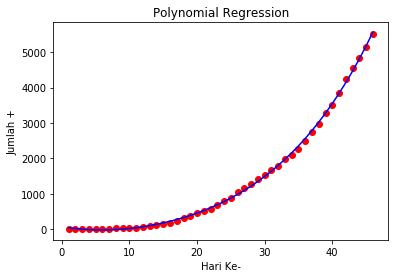

In [14]:
plt.scatter(dataset.Hari, y, color = "red")
plt.plot(X, y_pred2, color= "blue")
plt.title("Polynomial Regression")
plt.xlabel("Hari Ke-")
plt.ylabel("Jumlah +")

In [15]:
print(f"Accuracy Polynomial: {round(regression2.score(x_poly, y)*100,2)} %")

Accuracy Polynomial: 99.93 %


In [16]:
data_input = int(input("Masukan Hari Prediksi: "))

Masukan Hari Prediksi: 55


In [17]:
input_hari = dataset.iloc[-1:, 1].item()
print(f"Input terakhir data hari ke-{input_hari}\n")

lin_reg = regression.predict(np.array([[data_input]])).item()
lin_reg = int(lin_reg)
print("Linear Regression")
print(f"Prediksi jumlah + corona hari ke-{data_input}: {lin_reg} orang\n")

data = polinomial.fit_transform(np.array([[data_input]]))
pol_reg = regression2.predict(data).item()
pol_reg = int(pol_reg)
print("Polynomial Linear Regression")
print(f"Prediksi jumlah + corona hari ke-{data_input}: {pol_reg} orang")

Input terakhir data hari ke-46

Linear Regression
Prediksi jumlah + corona hari ke-55: 4902 orang

Polynomial Linear Regression
Prediksi jumlah + corona hari ke-55: 10227 orang


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
